In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('jetrail.csv')

In [58]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [60]:
# aggregating the dataset at daily level 
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index(['Datetime'],inplace=True)
df = df.resample('D').mean()

In [61]:
# creating train and test set
train = df[0:17553]
test = df[17553:]

In [62]:
train = train.resample('D').mean()
test = test.resample('D').mean()

In [65]:
y_hat_avg = test.copy()

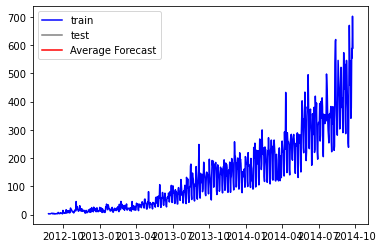

In [67]:
# Average Forecast
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.plot(train.index,train['Count'],color='blue',label='train')
plt.plot(test.index,test['Count'],color='gray',label='test')
plt.plot(y_hat_avg.index,y_hat_avg['avg_forecast'],color='red',label='Average Forecast')
plt.legend()
plt.show()

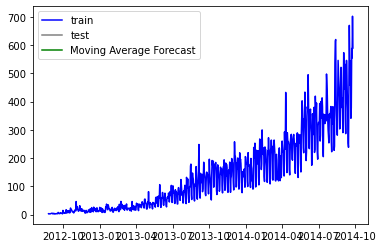

In [68]:
# Moving Average Forecast
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(window=10).mean().iloc[-1]
plt.plot(train.index,train['Count'],color='blue',label='train')
plt.plot(test.index,test['Count'],color='gray',label='test')
plt.plot(y_hat_avg.index,y_hat_avg['moving_avg_forecast'],color='green',label='Moving Average Forecast')
plt.legend()
plt.show()

C:\Users\shirl\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


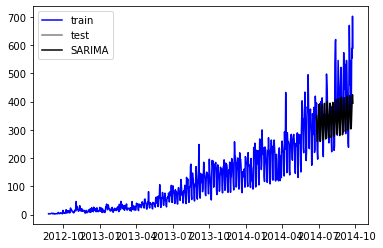

In [70]:
# SARIMAX
import statsmodels.api as sm
fit1 = sm.tsa.statespace.SARIMAX(train['Count'],order=(2,1,4),seasonal_order=(0,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-06-26',end='2014-09-25',dynamic=True)
plt.plot(train.index,train['Count'],color='blue',label='train')
plt.plot(test.index,test['Count'],color='gray',label='test')
plt.plot(y_hat_avg.index,y_hat_avg['SARIMA'],color='black',label='SARIMA')
plt.legend()
plt.show()